## **Descripción del Problema de Negocio:**

En el contexto empresarial de un servicio de reconocimiento de imágenes, nos enfrentamos al desafío de desarrollar un sistema de detección de objetos en imágenes utilizando el conjunto de datos CIFAR-10 proporcionado por Keras. Este problema tiene aplicaciones prácticas en diversas industrias, como la automotriz, la de seguridad, la de retail y la de atención médica.



Imaginemos una empresa que se especializa en el desarrollo de sistemas de asistencia a conductores inteligentes para automóviles. En este caso, el problema de negocio es mejorar la capacidad del sistema de visión del vehículo para identificar y clasificar objetos en tiempo real. Esto es crucial para garantizar la seguridad del conductor y de los ocupantes del vehículo.

IMPORTAMOS LIBRERIAS

## **Propuesta de Solución:**

Desarrollo de un Modelo Predictivo de Redes Neuronales para Detección de Objetos en Imágenes
1. Definición del Modelo:
Se propone el desarrollo de un modelo predictivo basado en redes neuronales convolucionales (CNN) para la detección de objetos en imágenes. Las redes neuronales convolucionales son especialmente efectivas en tareas de visión por computadora y han demostrado su capacidad para identificar patrones complejos en datos visuales.
2. Arquitectura del Modelo:
La arquitectura de la CNN se diseña para capturar características específicas de los objetos en las imágenes. Se utilizarán capas convolucionales y capas totalmente conectadas para extraer y aprender patrones jerárquicos. La elección de la arquitectura depende de la complejidad del problema y de la cantidad de datos disponibles.
3. Preprocesamiento de Datos:
Antes de alimentar los datos al modelo, se realiza un preprocesamiento exhaustivo. Esto incluirá la normalización de píxeles, el aumento de datos para evitar el sobreajuste y la segmentación de objetos para proporcionar información contextual adicional.
4. Conjunto de Datos:
Se utiliza el conjunto de datos CIFAR-10 para el entrenamiento y la validación del modelo. Este conjunto de datos contiene 60,000 imágenes en color de 32x32 píxeles, agrupadas en 10 clases diferentes de objetos. Este conjunto de datos es adecuado para nuestro problema de detección de objetos.
5. Entrenamiento y Validación del Modelo:
El modelo se entrena utilizando el conjunto de datos CIFAR-10, dividiéndolo en conjuntos de entrenamiento y validación. Durante el entrenamiento, el modelo ajustará sus pesos y aprenderá a reconocer patrones específicos relacionados con objetos en imágenes.
6. Evaluación del Modelo:
Se evaluará la eficacia del modelo utilizando métricas de rendimiento, como precisión, recall y F1-score, en el conjunto de datos de validación. Se realizará una validación cruzada y ajuste fino del modelo para garantizar su robustez y generalización.


In [1]:
import numpy as np
from keras.datasets import cifar10
from keras import models, layers, optimizers
from keras.utils import to_categorical
from keras import regularizers
import matplotlib.pyplot as plt
from tensorflow import keras

2023-11-28 00:13:46.711984: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-28 00:13:49.039094: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-28 00:13:49.039188: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-28 00:13:49.390134: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-28 00:13:50.140721: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-28 00:13:50.142734: I tensorflow/core/platform/cpu_feature_guard.cc:1

IMPORTAMOS LA DATA

In [2]:
# dataset : https://keras.io/api/datasets/cifar10/
(train_data, train_labels), (test_data, test_labels) = cifar10.load_data()

In [3]:
train_data.shape

(50000, 32, 32, 3)

In [4]:
train_labels.shape

(50000, 1)

In [5]:
train_labels[0:3]

array([[6],
       [9],
       [9]], dtype=uint8)

VISUALIZANDO LAS IMÁGENES



In [6]:
# Creando una lista de nombres de las clases
class_names = ['avión', 'automóvil', 'ave', 'gato', 'ciervo',
               'perro', 'sapo', 'caballo', 'barco', 'tractor']

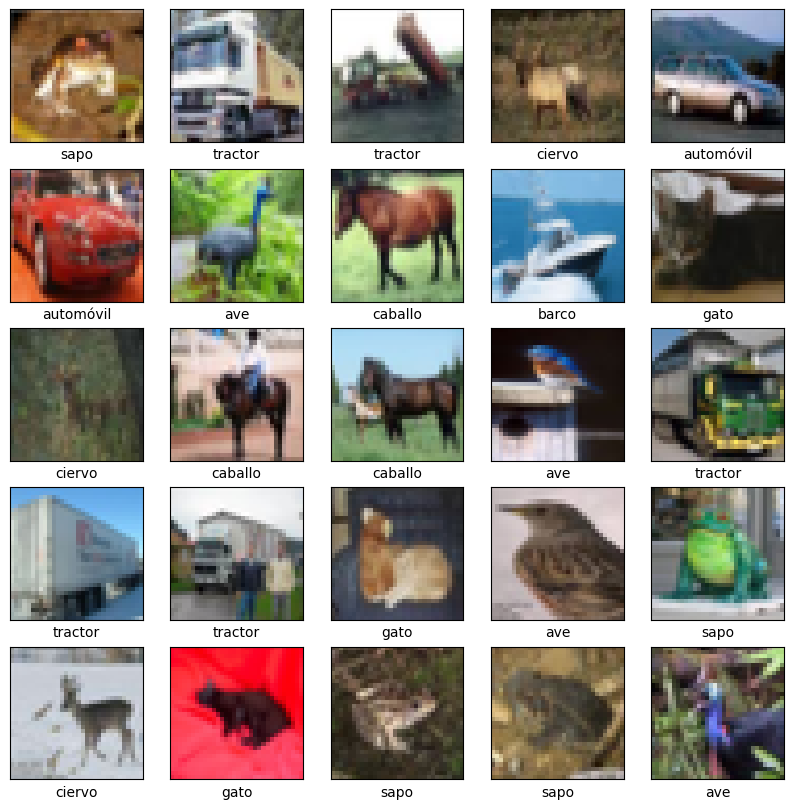

In [7]:
# Visualizando algunas imágenes en el dataset de entrenamiento
plt.figure(figsize=[10,10])
for i in range (25):    # para las primeras 5 imágenes
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_data[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i][0]])

plt.show()

LIMPIEZA DE DATOS

In [8]:
x_train = train_data.reshape((50000,32*32*3))
x_train = x_train.astype('float32')/255

x_test = test_data.reshape((10000,32*32*3))
x_test = x_test.astype('float32')/255

print(x_train.shape)
print(x_test.shape)

(50000, 3072)
(10000, 3072)


In [9]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [10]:
print(train_labels[0])
print(y_train[0])

[6]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


## **SIN REGULARIZACIÓN**

In [11]:
ann1 = models.Sequential()
ann1.add(layers.Dense(516,activation='relu',input_shape=(32*32*3,)))
ann1.add(layers.Dense(128,activation='relu',input_shape=(32*32*3,)))
ann1.add(layers.Dense(64,activation='relu'))
ann1.add(layers.Dense(32,activation='relu',))
ann1.add(layers.Dense(10,activation='softmax'))

# Resumen del modelo
ann1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 516)               1585668   
                                                                 
 dense_1 (Dense)             (None, 128)               66176     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
Total params: 1662510 (6.34 MB)
Trainable params: 1662510 (6.34 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Compilación**

In [12]:
### COMPILACIÓN de la ANN1
ann1.compile(optimizer='adam', 
             loss='categorical_crossentropy',
             metrics=['accuracy'])

**Entrenamiento**

In [13]:
x_val = x_train[:5000]
partial_x_train = x_train[5000:]
y_val = y_train[:5000]
partial_y_train = y_train[5000:]

In [14]:
### Entrenamiento de la ANN1
history = ann1.fit(partial_x_train, partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val,y_val))

2023-11-28 00:14:16.129189: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 552960000 exceeds 10% of free system memory.


Epoch 1/40
88/88 [==============================] - ETA: 0s - loss: 2.0583 - accuracy: 0.2475

2023-11-28 00:14:23.219377: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 61440000 exceeds 10% of free system memory.


88/88 [==============================] - 7s 62ms/step - loss: 2.0583 - accuracy: 0.2475 - val_loss: 1.8647 - val_accuracy: 0.3382
Epoch 2/40
88/88 [==============================] - 5s 61ms/step - loss: 1.8302 - accuracy: 0.3414 - val_loss: 1.7639 - val_accuracy: 0.3694
Epoch 3/40
88/88 [==============================] - 5s 61ms/step - loss: 1.7514 - accuracy: 0.3756 - val_loss: 1.7164 - val_accuracy: 0.3830
Epoch 4/40
88/88 [==============================] - 5s 59ms/step - loss: 1.6913 - accuracy: 0.3978 - val_loss: 1.6455 - val_accuracy: 0.4094
Epoch 5/40
88/88 [==============================] - 5s 62ms/step - loss: 1.6377 - accuracy: 0.4169 - val_loss: 1.6888 - val_accuracy: 0.3912
Epoch 6/40
88/88 [==============================] - 5s 58ms/step - loss: 1.6119 - accuracy: 0.4282 - val_loss: 1.6202 - val_accuracy: 0.4138
Epoch 7/40
88/88 [==============================] - 5s 59ms/step - loss: 1.5646 - accuracy: 0.4446 - val_loss: 1.5833 - val_accuracy: 0.4306
Epoch 8/40
88/88 [======

## **CON REGULARIZACIÓN**

CONTRUCCIÓN DEL MODELO

In [15]:
model = models.Sequential()
model.add(layers.Dense(516,activation='relu',input_shape=(32*32*3,),
                       kernel_regularizer=regularizers.l2(0.0001)))
model.add(layers.Dense(128,activation='relu',input_shape=(32*32*3,),
                       kernel_regularizer=regularizers.l2(0.0001)))
model.add(layers.Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.0001)))
model.add(layers.Dense(32,activation='relu',kernel_regularizer=regularizers.l2(0.0001)))
model.add(layers.Dense(10,activation='softmax'))

# Resumen del modelo
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 516)               1585668   
                                                                 
 dense_6 (Dense)             (None, 128)               66176     
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 10)                330       
                                                                 
Total params: 1662510 (6.34 MB)
Trainable params: 1662510 (6.34 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

ENTRENANDO EL MODELO

In [17]:
x_val = x_train[:5000]
partial_x_train = x_train[5000:]
y_val = y_train[:5000]
partial_y_train = y_train[5000:]

In [18]:
history = model.fit(partial_x_train, partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val,y_val))

Epoch 1/40


2023-11-28 00:18:40.373544: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 552960000 exceeds 10% of free system memory.


88/88 [==============================] - ETA: 0s - loss: 2.2288 - accuracy: 0.2253

2023-11-28 00:18:46.785971: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 61440000 exceeds 10% of free system memory.


88/88 [==============================] - 6s 64ms/step - loss: 2.2288 - accuracy: 0.2253 - val_loss: 2.0268 - val_accuracy: 0.2934
Epoch 2/40
88/88 [==============================] - 5s 59ms/step - loss: 1.9691 - accuracy: 0.3255 - val_loss: 1.9028 - val_accuracy: 0.3396
Epoch 3/40
88/88 [==============================] - 5s 60ms/step - loss: 1.8615 - accuracy: 0.3608 - val_loss: 1.7945 - val_accuracy: 0.3838
Epoch 4/40
88/88 [==============================] - 5s 59ms/step - loss: 1.7912 - accuracy: 0.3842 - val_loss: 1.8109 - val_accuracy: 0.3790
Epoch 5/40
88/88 [==============================] - 5s 58ms/step - loss: 1.7351 - accuracy: 0.4052 - val_loss: 1.7125 - val_accuracy: 0.3976
Epoch 6/40
88/88 [==============================] - 5s 62ms/step - loss: 1.6898 - accuracy: 0.4180 - val_loss: 1.6728 - val_accuracy: 0.4140
Epoch 7/40
88/88 [==============================] - 5s 60ms/step - loss: 1.6524 - accuracy: 0.4306 - val_loss: 1.6313 - val_accuracy: 0.4384
Epoch 8/40
88/88 [======

EVALUANDO EL DATASET

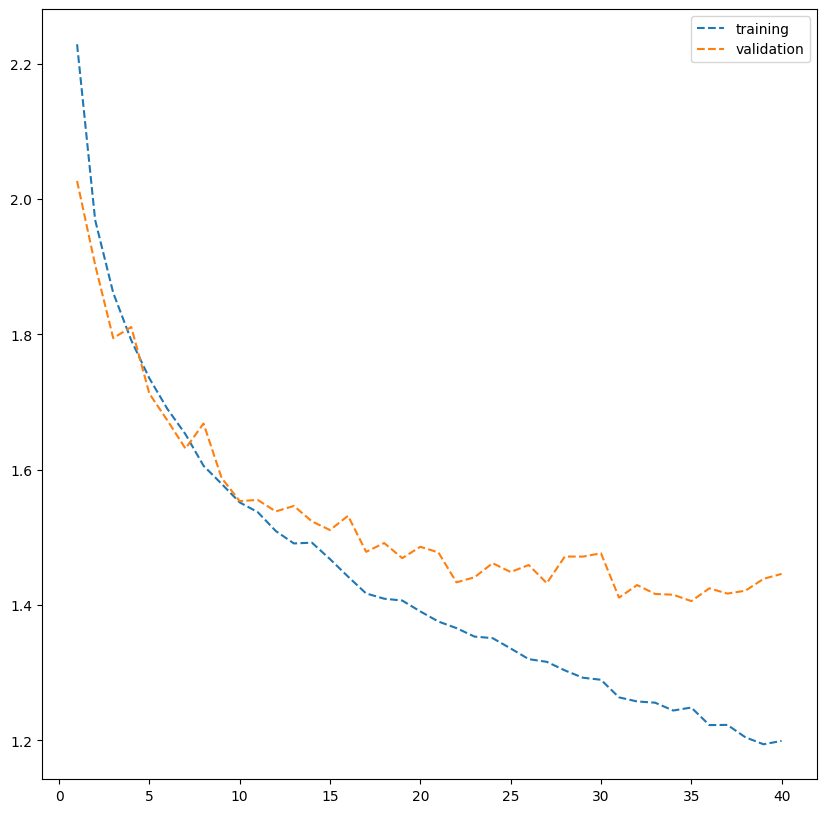

In [19]:
# loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

fig = plt.figure(figsize=(10,10))
epoch = range(1, len(loss_values)+1)
plt.plot(epoch, loss_values, '--', label = 'training')
plt.plot(epoch, val_loss_values, '--', label = 'validation')
plt.legend()
plt.show()

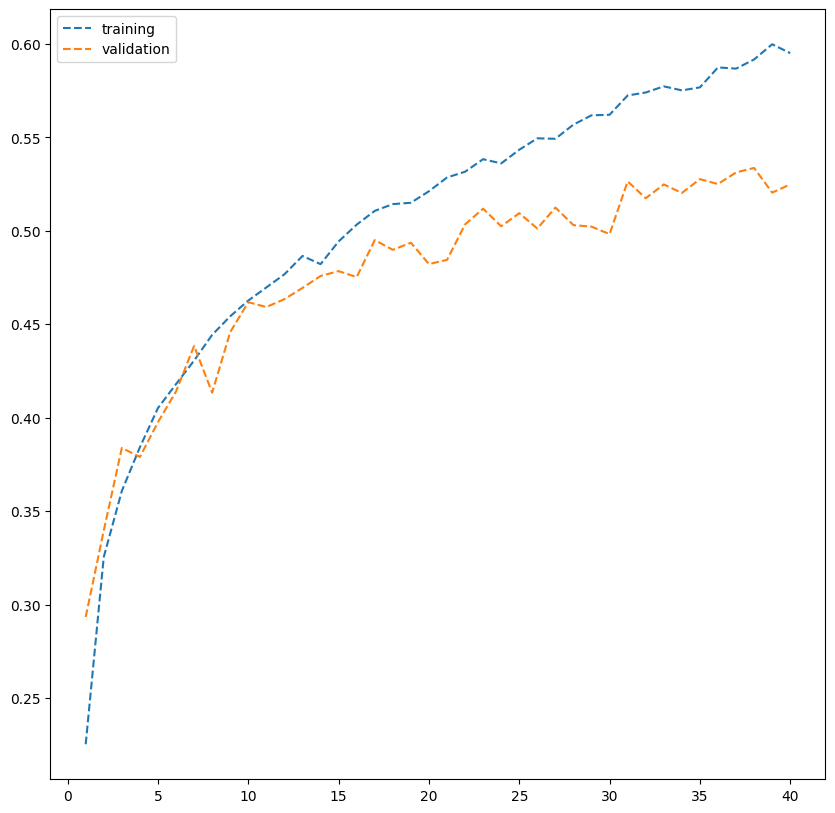

In [20]:
# accuracy
history_dict = history.history
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

fig = plt.figure(figsize=(10,10))
epoch = range(1, len(accuracy)+1)
plt.plot(epoch, accuracy, '--', label = 'training')
plt.plot(epoch, val_accuracy, '--', label = 'validation')
plt.legend()
plt.show()

In [21]:
model.evaluate(x_test,y_test)

 19/313 [>.............................] - ETA: 0s - loss: 1.4811 - accuracy: 0.5115

 36/313 [==>...........................] - ETA: 0s - loss: 1.4693 - accuracy: 0.5122

2023-11-28 00:22:13.054572: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


313/313 [==============================] - 1s 3ms/step - loss: 1.4564 - accuracy: 0.5143


[1.456424593925476, 0.5142999887466431]

PREDICCIONES

In [22]:
# Haciendo predicciones
y_predict = model.predict(x_test)

# Convirtiendo las predicciones en un label (tomando el valor máximo de predicción)
y_predict_classes = np.argmax(y_predict, axis=1)

  1/313 [..............................] - ETA: 21s

313/313 [==============================] - 1s 2ms/step


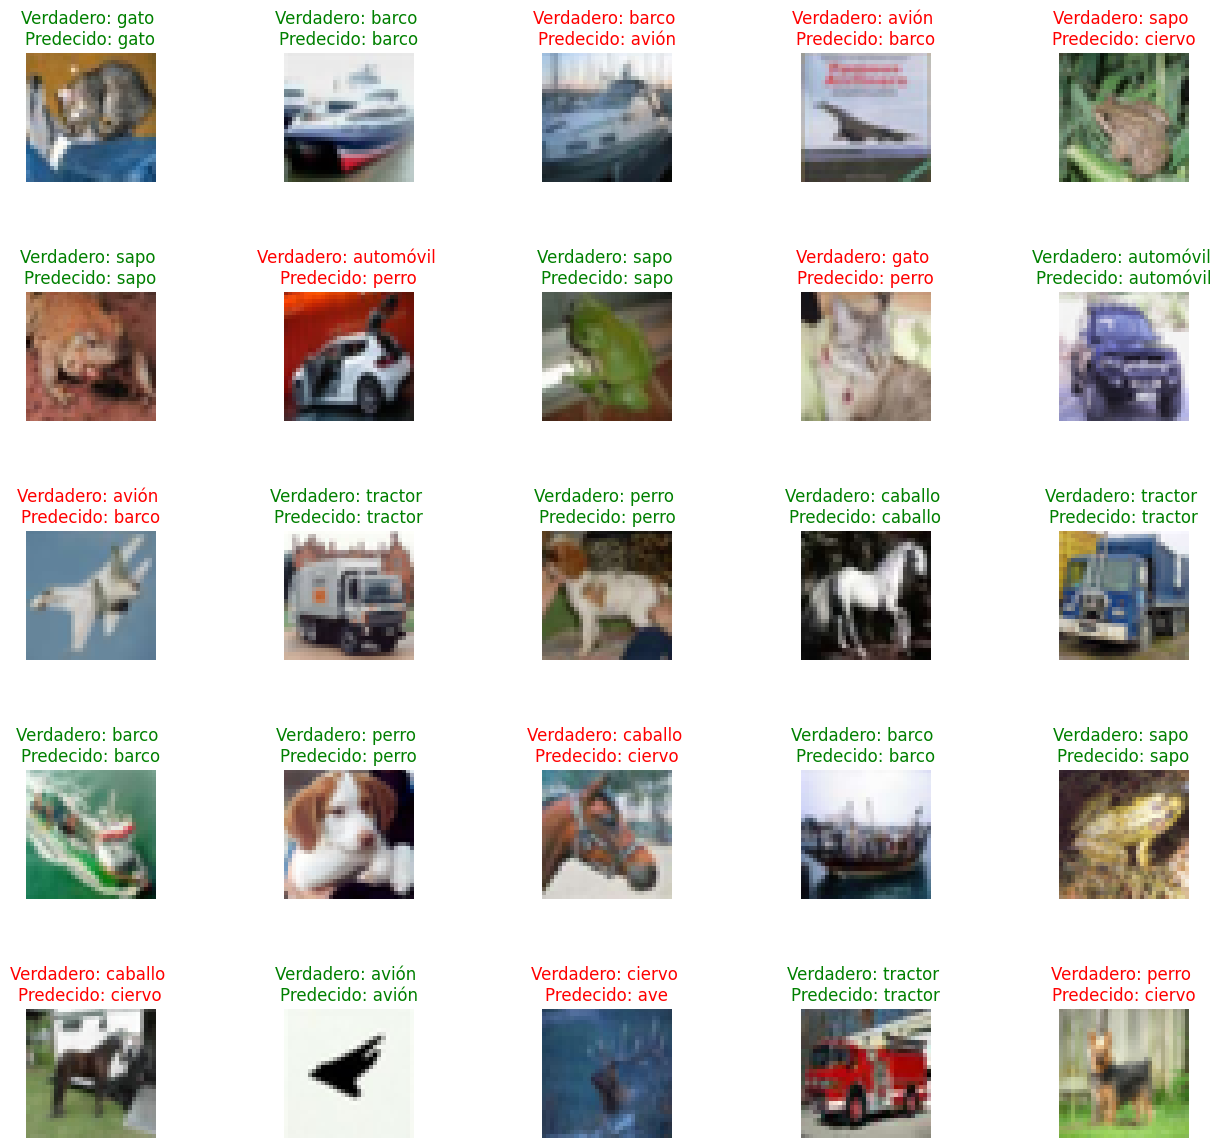

In [23]:
# Graficando Clase real vs. Clase predecidas

fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, 25):
    axes[i].imshow(test_data[i])
    title_color = "green" if np.argmax(y_test[i]) == y_predict_classes[i] else "red"
    axes[i].set_title("Verdadero: %s \nPredecido: %s" % (class_names[np.argmax(y_test[i])], class_names[y_predict_classes[i]]), color=title_color)
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

In [24]:
from tensorflow.keras import regularizers

**Definir Red con regularización**

In [25]:
### Dimesiones de la imagen
filas_img = 32
columnas_img = 32

In [26]:
### ANN 2: red neuronal regularizada
ann2=keras.models.Sequential(
    [
    keras.layers.Flatten(input_shape=[filas_img, columnas_img]),
    keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.L2(l2=0.01)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax') #La variable objetivo tiene 10 clases, por ello se usa 10 capas de salida
    ]
)

**Compilación**

In [27]:
### COMPILACIÓN de la ANN1
ann2.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

**Entrenamiento**

In [39]:
### Entrenamiento de la ANN1
history_2 = -ann2.fit(x_train, y_train, epochs=15, validation_data=(x_test, y_test))

Epoch 1/15


ValueError: in user code:

    File "/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_2" is incompatible with the layer: expected shape=(None, 32, 32), found shape=(None, 3072)


**Historial de entrenamiento**

In [31]:
### Listado de toda la data almacenada en 'history'
print(history_2.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


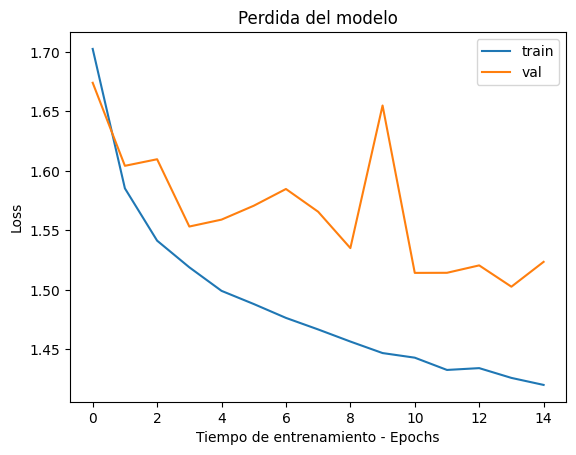

In [32]:
### Visualización de las curvas de error
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('Perdida del modelo')
plt.xlabel('Tiempo de entrenamiento - Epochs')
plt.ylabel('Loss')
plt.legend(['train','val'])
plt.show()

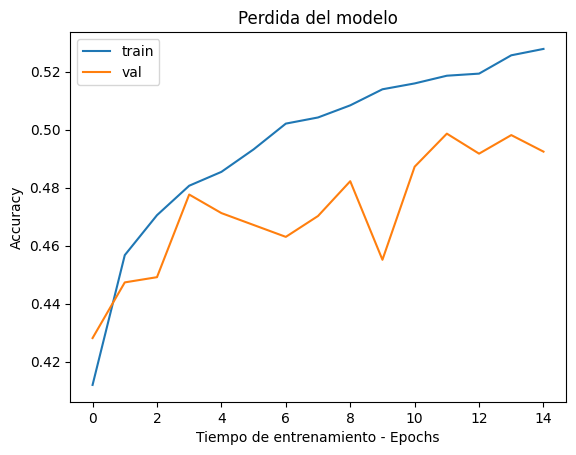

In [33]:
### Visualización de las curvas de error
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Perdida del modelo')
plt.xlabel('Tiempo de entrenamiento - Epochs')
plt.ylabel('Accuracy')
plt.legend(['train','val'])
plt.show()

**Definir Red con regularización**

In [34]:
### ANN 3: red neuronal regularizada
ann3=keras.models.Sequential(
    [
    keras.layers.Flatten(input_shape=[filas_img, columnas_img]),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax') #La variable objetivo tiene 10 clases, por ello se usa 10 capas de salida
    ]
)

**Compilación**

In [35]:
### COMPILACIÓN de la ANN1
ann3.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

**Entrenamiento**

In [37]:
### Entrenamiento de la ANN1
history_3 = ann3.fit(x_train, y_train, epochs=15, validation_data=(x_test, y_test))

Epoch 1/15


ValueError: in user code:

    File "/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_3" is incompatible with the layer: expected shape=(None, 32, 32), found shape=(None, 3072)


**Historial de entrenamiento**

In [38]:
### Listado de toda la data almacenada en 'history'
print(history_3.history.keys())

NameError: name 'history_3' is not defined

In [ ]:
### Visualización de las curvas de error
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('Perdida del modelo')
plt.xlabel('Tiempo de entrenamiento - Epochs')
plt.ylabel('Loss')
plt.legend(['train','val'])
plt.show()

In [ ]:
### Visualización de las curvas de error
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('Perdida del modelo')
plt.xlabel('Tiempo de entrenamiento - Epochs')
plt.ylabel('Accuracy')
plt.legend(['train','val'])
plt.show()

## **CONCLUCIONES**